In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
from shapely.geometry import Polygon, Point, LineString
import matplotlib.pyplot as plt
import os
import urllib
%matplotlib inline

# Trial 1
Geopandas Line Polygon Intersection
https://gis.stackexchange.com/questions/246782/geopandas-line-polygon-intersection

In [3]:
polygon = Polygon([(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)])
line1 = LineString([(0.5, 0.5), (0.7, 0.7)])
line2 = LineString([(0.9, 0.9), (0.2, 0.6)])

poly_gdf = gpd.GeoDataFrame(geometry=[polygon])
line_gdf = gpd.GeoDataFrame(geometry=[line1])

In [4]:
type(polygon)

shapely.geometry.polygon.Polygon

In [5]:
type(line1)

shapely.geometry.linestring.LineString

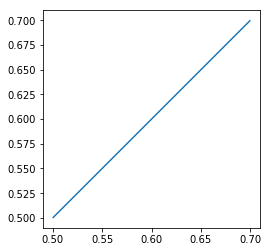

In [6]:
line_gdf.plot()

In [7]:
line_gdf['geometry']

0    LINESTRING (0.5 0.5, 0.7 0.7)
Name: geometry, dtype: object

# Trial 2 
Turn a GeoDataFrame of x,y coordinates into Linestrings using GROUPBY?
https://gis.stackexchange.com/questions/202190/turn-a-geodataframe-of-x-y-coordinates-into-linestrings-using-groupby

In [8]:
x = [1,2]
y = [11,12]
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [9]:
df = pd.merge(x,y,left_index=True, right_index=True)
df.columns = ['lon','lat']
df

,lon,lat
0,1,11
1,2,12


In [10]:
# Zip the coordinates into a point object and convert to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = gpd.GeoDataFrame(df, geometry=geometry)
df['id'] = [1,2]
df

,lon,lat,geometry,id
0,1,11,POINT (1 11),1
1,2,12,POINT (2 12),2


# Aggregate these points with the GroupBy
df = df.groupby(['id'])['geometry'].apply(lambda x: LineString(x.tolist()))
df = GeoDataFrame(df, geometry='geometry')

# Trial 3 根据两点的坐标计算方位角
https://blog.csdn.net/JohinieLi/article/details/81041550 

In [2]:
import math

In [3]:
def azimuthAngle( x1,  y1,  x2,  y2):
    angle = 0.0
    dx = x2 - x1
    dy = y2 - y1
    angle = math.atan(dx / dy)
    return (angle * 180 / math.pi)

In [4]:
def azimuthAngle( x1,  y1,  x2,  y2):
    angle = 0.0;
    dx = x2 - x1
    dy = y2 - y1
    if  x2 == x1:
        angle = math.pi / 2.0
        if  y2 == y1 :
            angle = 0.0
        elif y2 < y1 :
            angle = 3.0 * math.pi / 2.0
    elif x2 > x1 and y2 > y1:
        angle = math.atan(dx / dy)
    elif  x2 > x1 and  y2 < y1 :
        angle = math.pi / 2 + math.atan(-dy / dx)
    elif  x2 < x1 and y2 < y1 :
        angle = math.pi + math.atan(dx / dy)
    elif  x2 < x1 and y2 > y1 :
        angle = 3.0 * math.pi / 2.0 + math.atan(dy / -dx)
    return (angle * 180 / math.pi)

In [14]:
azimuthAngle(1,1,2,-2)

161.56505117707798

# Trial 4 shp分解

In [5]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
puidata = os.getenv("PUIDATA")

In [8]:
url = 'https://data.cityofnewyork.us/api/geospatial/uxpt-rzip?method=export&format=Shapefile'
urllib.request.urlretrieve(url, "file.gz")
!mv file.gz $PUIDATA
!unzip -o $PUIDATA/file.gz -d $PUIDATA

unzip:  cannot find or open /Users/hemingyi/PUIdata/file.gz, /Users/hemingyi/PUIdata/file.gz.zip or /Users/hemingyi/PUIdata/file.gz.ZIP.


In [7]:
#https://data.cityofnewyork.us/api/geospatial/uxpt-rzip?method=export&format=Shapefile
if not os.path.isfile(os.getenv("PUIDATA") + "/" + "geo_export_cc6a080f-75ba-471e-bf18-063f48438e02.shp"):
    url = 'https://data.cityofnewyork.us/api/geospatial/uxpt-rzip?method=export&format=Shapefile'
    urllib.request.urlretrieve(url, "file.gz")
    !mv file.gz $PUIDATA
    !unzip -o $PUIDATA/file.gz -d $PUIDATA
else:
    print("file downloaded in place, you can continue")

KeyboardInterrupt: 

In [17]:
shp = gpd.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/' + 'geo_export_cc6a080f-75ba-471e-bf18-063f48438e02.shp')

In [18]:
shp.head()

,accessible,b_5_sc,bike_lane,borough_in,boroughcod,bphys_id,collection,continuous,created_by,date_creat,...,seglocstat,segmentlen,shape_leng,status,stname_lab,to_level_c,trafdir,twisted_pa,within_bnd,geometry
0,None,422090,None,None,4,32216.0,F,None,DCP,2007-11-29,...,None,247.574052,247.574169,2,133 AV,13.0,TW,N,None,LINESTRING (-73.79099657195559 40.668537610985...
1,None,447390,None,None,4,7141.0,None,None,CSCL,2009-06-16,...,None,650.954864,650.954853,2,GRAND CENTRAL PKWY,13.0,FT,N,None,LINESTRING (-73.84554250435114 40.739657802135...
2,None,389730,None,None,3,38225.0,None,None,DCP,2007-11-29,...,None,540.018383,540.018331,2,WASHINGTON AV,13.0,TW,N,None,LINESTRING (-73.96582204725706 40.688209422824...
3,None,418740,None,None,4,97055.0,None,None,DCP,2007-11-29,...,None,260.488089,260.488194,2,94 ST,13.0,TW,N,None,LINESTRING (-73.86924838521583 40.740570212007...
4,None,444240,None,None,4,32551.0,None,None,DCP,2007-11-29,...,None,266.565951,266.565969,2,E WILLISTON AV,13.0,TW,N,None,LINESTRING (-73.70929613528641 40.734719207152...


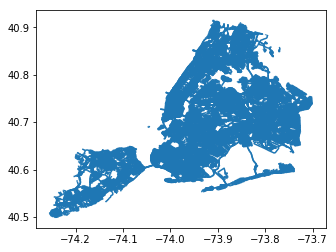

In [19]:
shp.plot()

In [20]:
shp['boroughcod'].unique()

array(['4', '3', '2', '1', '5'], dtype=object)

In [21]:
shp.groupby('boroughcod').count()

,accessible,b_5_sc,bike_lane,borough_in,bphys_id,collection,continuous,created_by,date_creat,time_creat,...,seglocstat,segmentlen,shape_leng,status,stname_lab,to_level_c,trafdir,twisted_pa,within_bnd,geometry
boroughcod,,,,,,,,,,,,,,,,,,,,,
1,40,11555,2266,0,11555,948,327,11555,11555,11555,...,2300,11555,11555,11555,11555,11555,11555,11555,0,11555
2,8,16094,1255,0,16094,1096,101,16093,16094,16094,...,3710,16094,16094,16094,16094,16094,16093,16094,0,16094
3,7,24893,2934,85,24893,3676,96,24893,24893,24893,...,7053,24893,24893,24893,24893,24893,24891,24893,353,24893
4,4,41333,1854,0,41333,4976,90,41333,41333,41333,...,7590,41333,41333,41333,41333,41333,41331,41333,270,41333
5,3,15143,336,0,15143,2054,46,15143,15143,15143,...,3042,15143,15143,15143,15143,15143,15140,15143,0,15143


In [22]:
shp.head()

,accessible,b_5_sc,bike_lane,borough_in,boroughcod,bphys_id,collection,continuous,created_by,date_creat,...,seglocstat,segmentlen,shape_leng,status,stname_lab,to_level_c,trafdir,twisted_pa,within_bnd,geometry
0,None,422090,None,None,4,32216.0,F,None,DCP,2007-11-29,...,None,247.574052,247.574169,2,133 AV,13.0,TW,N,None,LINESTRING (-73.79099657195559 40.668537610985...
1,None,447390,None,None,4,7141.0,None,None,CSCL,2009-06-16,...,None,650.954864,650.954853,2,GRAND CENTRAL PKWY,13.0,FT,N,None,LINESTRING (-73.84554250435114 40.739657802135...
2,None,389730,None,None,3,38225.0,None,None,DCP,2007-11-29,...,None,540.018383,540.018331,2,WASHINGTON AV,13.0,TW,N,None,LINESTRING (-73.96582204725706 40.688209422824...
3,None,418740,None,None,4,97055.0,None,None,DCP,2007-11-29,...,None,260.488089,260.488194,2,94 ST,13.0,TW,N,None,LINESTRING (-73.86924838521583 40.740570212007...
4,None,444240,None,None,4,32551.0,None,None,DCP,2007-11-29,...,None,266.565951,266.565969,2,E WILLISTON AV,13.0,TW,N,None,LINESTRING (-73.70929613528641 40.734719207152...


In [23]:
shp.columns

Index(['accessible', 'b_5_sc', 'bike_lane', 'borough_in', 'boroughcod',
       'bphys_id', 'collection', 'continuous', 'created_by', 'date_creat',
       'time_creat', 'from_level', 'l_high_hn', 'l_low_hn', 'l_zip',
       'lsubsect', 'modified_b', 'date_modif', 'time_modif', 'nonped',
       'objectid', 'physicalid', 'r_high_hn', 'r_low_hn', 'r_zip', 'rsubsect',
       'rw_type', 'rwjurisdic', 'sandist_in', 'seglocstat', 'segmentlen',
       'shape_leng', 'status', 'stname_lab', 'to_level_c', 'trafdir',
       'twisted_pa', 'within_bnd', 'geometry'],
      dtype='object')

In [24]:
#x = df[df['A'] == 3]
#man = ct[ct['boro_name'] == "Manhattan"]
shp[shp['boroughcod']=='1']

,accessible,b_5_sc,bike_lane,borough_in,boroughcod,bphys_id,collection,continuous,created_by,date_creat,...,seglocstat,segmentlen,shape_leng,status,stname_lab,to_level_c,trafdir,twisted_pa,within_bnd,geometry
12,None,134110,None,None,1,756.0,None,None,DCP,2007-11-29,...,None,28.005265,54.871697,2,W 17 ST,13.0,FT,N,None,LINESTRING (-74.0082589089775 40.7446738428875...
21,None,118190,None,None,1,23368.0,None,None,DCP,2007-11-29,...,None,367.416162,375.239267,2,E 60 ST,13.0,FT,N,None,LINESTRING (-73.9626945760758 40.7607460524364...
34,None,133490,None,None,1,4357.0,None,None,DCP,2007-11-29,...,None,83.302364,83.302336,2,WATER ST,13.0,FT,N,None,LINESTRING (-73.98391366493104 40.711303332442...
38,None,197110,None,None,1,148650.0,None,None,DCP,2007-11-29,...,None,368.307421,472.176479,2,CENTRAL PARK GR HILL,13.0,NV,N,None,LINESTRING (-73.95925070110951 40.796498762011...
58,None,113610,None,None,1,2901.0,F,None,DCP,2007-11-29,...,None,259.939516,259.939595,2,BROADWAY,13.0,TF,N,None,LINESTRING (-73.94778083851676 40.830263780459...
65,None,132790,None,None,1,26755.0,None,None,DCP,2007-11-29,...,None,289.503508,289.503483,2,WADSWORTH AV,13.0,TW,N,None,LINESTRING (-73.93547108195284 40.849144383074...
81,None,197890,None,None,1,131517.0,None,None,DCP,2007-11-29,...,None,106.778865,33.964327,2,MADISON AV BR,17.0,FT,N,None,LINESTRING (-73.93419101755205 40.814089650452...
84,None,120430,None,None,1,579.0,None,None,DCP,2007-11-29,...,X,213.930652,213.930635,2,EXCHANGE PL,13.0,TF,N,None,LINESTRING (-74.01118994205468 40.706278727518...
113,None,136030,None,None,1,67011.0,None,None,DCP,2007-11-29,...,None,34.959203,51.366632,2,W 113 ST,13.0,FT,N,None,"LINESTRING (-73.9538432951848 40.801249906417,..."
125,None,136810,None,None,1,19841.0,None,None,DCP,2007-11-29,...,None,609.740459,609.740588,2,W 152 ST,13.0,TF,N,None,LINESTRING (-73.94732595299794 40.830887994958...


In [25]:
shp = shp[shp['boroughcod'] == '1']

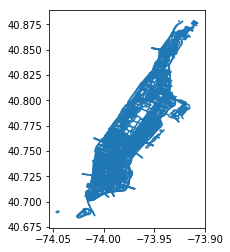

In [26]:
shp.plot()

In [27]:
shp.reset_index(inplace=True)

In [28]:
shp.head()

,index,accessible,b_5_sc,bike_lane,borough_in,boroughcod,bphys_id,collection,continuous,created_by,...,seglocstat,segmentlen,shape_leng,status,stname_lab,to_level_c,trafdir,twisted_pa,within_bnd,geometry
0,12,None,134110,None,None,1,756.0,None,None,DCP,...,None,28.005265,54.871697,2,W 17 ST,13.0,FT,N,None,LINESTRING (-74.0082589089775 40.7446738428875...
1,21,None,118190,None,None,1,23368.0,None,None,DCP,...,None,367.416162,375.239267,2,E 60 ST,13.0,FT,N,None,LINESTRING (-73.9626945760758 40.7607460524364...
2,34,None,133490,None,None,1,4357.0,None,None,DCP,...,None,83.302364,83.302336,2,WATER ST,13.0,FT,N,None,LINESTRING (-73.98391366493104 40.711303332442...
3,38,None,197110,None,None,1,148650.0,None,None,DCP,...,None,368.307421,472.176479,2,CENTRAL PARK GR HILL,13.0,NV,N,None,LINESTRING (-73.95925070110951 40.796498762011...
4,58,None,113610,None,None,1,2901.0,F,None,DCP,...,None,259.939516,259.939595,2,BROADWAY,13.0,TF,N,None,LINESTRING (-73.94778083851676 40.830263780459...


In [29]:
df.reset_index?

In [30]:
shp.head()

,index,accessible,b_5_sc,bike_lane,borough_in,boroughcod,bphys_id,collection,continuous,created_by,...,seglocstat,segmentlen,shape_leng,status,stname_lab,to_level_c,trafdir,twisted_pa,within_bnd,geometry
0,12,None,134110,None,None,1,756.0,None,None,DCP,...,None,28.005265,54.871697,2,W 17 ST,13.0,FT,N,None,LINESTRING (-74.0082589089775 40.7446738428875...
1,21,None,118190,None,None,1,23368.0,None,None,DCP,...,None,367.416162,375.239267,2,E 60 ST,13.0,FT,N,None,LINESTRING (-73.9626945760758 40.7607460524364...
2,34,None,133490,None,None,1,4357.0,None,None,DCP,...,None,83.302364,83.302336,2,WATER ST,13.0,FT,N,None,LINESTRING (-73.98391366493104 40.711303332442...
3,38,None,197110,None,None,1,148650.0,None,None,DCP,...,None,368.307421,472.176479,2,CENTRAL PARK GR HILL,13.0,NV,N,None,LINESTRING (-73.95925070110951 40.796498762011...
4,58,None,113610,None,None,1,2901.0,F,None,DCP,...,None,259.939516,259.939595,2,BROADWAY,13.0,TF,N,None,LINESTRING (-73.94778083851676 40.830263780459...


In [31]:
df.iloc?

In [32]:
shpsample = shp.iloc[:10:]

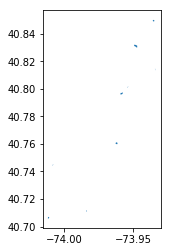

In [33]:
shpsample.plot()

# Trial 5 shp提取起点&终点

http://toblerity.org/shapely/manual.html

In [34]:
type(shp.geometry[3])

shapely.geometry.linestring.LineString

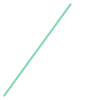

In [35]:
linesample = shp.geometry[5]
linesample

In [36]:
# startpoint
linesample.coords[0]

(-73.93547108195284, 40.849144383074204)

In [37]:
# endpoint
linesample.coords[-1]

(-73.93496529247663, 40.849839999219384)

In [38]:
type(linesample.coords[-1])

tuple

In [39]:
endpoint = linesample.coords[-1]
print(endpoint[0])
print(endpoint[1])

-73.93496529247663
40.849839999219384


In [40]:
# object.bounds: Returns a (minx, miny, maxx, maxy) tuple (float values) that bounds the object.
linesample.bounds

(-73.93547108195284,
 40.849144383074204,
 -73.93496529247663,
 40.849839999219384)

In [41]:
shp.geometry[3].length

0.0015327435325163047

In [42]:
linesample.coords

In [43]:
linesample.geom_type

'LineString'

In [44]:
linesample.contains

<bound method BaseGeometry.contains of <shapely.geometry.linestring.LineString object at 0x7f415ab77f98>>

# 6 提取起点终点

In [45]:
type(shp.geometry[3])

shapely.geometry.linestring.LineString

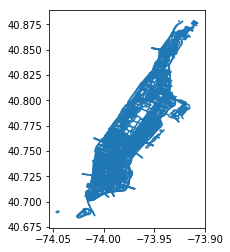

In [46]:
shp.plot()

In [47]:
len(shp)

11555

In [48]:
shp.shape

(11555, 40)

In [49]:
shp['geometry'][0].coords[0]

(-74.0082589089775, 40.7446738428875)

In [50]:
shp['startpoint'] = None
shp['endpoint'] = None
shp

,index,accessible,b_5_sc,bike_lane,borough_in,boroughcod,bphys_id,collection,continuous,created_by,...,shape_leng,status,stname_lab,to_level_c,trafdir,twisted_pa,within_bnd,geometry,startpoint,endpoint
0,12,None,134110,None,None,1,756.0,None,None,DCP,...,54.871697,2,W 17 ST,13.0,FT,N,None,LINESTRING (-74.0082589089775 40.7446738428875...,None,None
1,21,None,118190,None,None,1,23368.0,None,None,DCP,...,375.239267,2,E 60 ST,13.0,FT,N,None,LINESTRING (-73.9626945760758 40.7607460524364...,None,None
2,34,None,133490,None,None,1,4357.0,None,None,DCP,...,83.302336,2,WATER ST,13.0,FT,N,None,LINESTRING (-73.98391366493104 40.711303332442...,None,None
3,38,None,197110,None,None,1,148650.0,None,None,DCP,...,472.176479,2,CENTRAL PARK GR HILL,13.0,NV,N,None,LINESTRING (-73.95925070110951 40.796498762011...,None,None
4,58,None,113610,None,None,1,2901.0,F,None,DCP,...,259.939595,2,BROADWAY,13.0,TF,N,None,LINESTRING (-73.94778083851676 40.830263780459...,None,None
5,65,None,132790,None,None,1,26755.0,None,None,DCP,...,289.503483,2,WADSWORTH AV,13.0,TW,N,None,LINESTRING (-73.93547108195284 40.849144383074...,None,None
6,81,None,197890,None,None,1,131517.0,None,None,DCP,...,33.964327,2,MADISON AV BR,17.0,FT,N,None,LINESTRING (-73.93419101755205 40.814089650452...,None,None
7,84,None,120430,None,None,1,579.0,None,None,DCP,...,213.930635,2,EXCHANGE PL,13.0,TF,N,None,LINESTRING (-74.01118994205468 40.706278727518...,None,None
8,113,None,136030,None,None,1,67011.0,None,None,DCP,...,51.366632,2,W 113 ST,13.0,FT,N,None,"LINESTRING (-73.9538432951848 40.801249906417,...",None,None
9,125,None,136810,None,None,1,19841.0,None,None,DCP,...,609.740588,2,W 152 ST,13.0,TF,N,None,LINESTRING (-73.94732595299794 40.830887994958...,None,None


In [51]:
for i in range(len(shp)):
    print(i)
    shp['startpoint'][i] = shp['geometry'][i].coords[0]
    shp['endpoint'][i] = shp['geometry'][i].coords[-1]

0


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123


3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763


5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402


6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041


8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681


10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
1026

11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554


In [52]:
shp

,index,accessible,b_5_sc,bike_lane,borough_in,boroughcod,bphys_id,collection,continuous,created_by,...,shape_leng,status,stname_lab,to_level_c,trafdir,twisted_pa,within_bnd,geometry,startpoint,endpoint
0,12,None,134110,None,None,1,756.0,None,None,DCP,...,54.871697,2,W 17 ST,13.0,FT,N,None,LINESTRING (-74.0082589089775 40.7446738428875...,"(-74.0082589089775, 40.7446738428875)","(-74.00844302914543, 40.74472897699489)"
1,21,None,118190,None,None,1,23368.0,None,None,DCP,...,375.239267,2,E 60 ST,13.0,FT,N,None,LINESTRING (-73.9626945760758 40.7607460524364...,"(-73.9626945760758, 40.76074605243648)","(-73.96152208563745, 40.7602303599116)"
2,34,None,133490,None,None,1,4357.0,None,None,DCP,...,83.302336,2,WATER ST,13.0,FT,N,None,LINESTRING (-73.98391366493104 40.711303332442...,"(-73.98391366493104, 40.71130333244239)","(-73.98361462167439, 40.71132564088042)"
3,38,None,197110,None,None,1,148650.0,None,None,DCP,...,472.176479,2,CENTRAL PARK GR HILL,13.0,NV,N,None,LINESTRING (-73.95925070110951 40.796498762011...,"(-73.95925070110951, 40.79649876201151)","(-73.95822199583391, 40.797193607676796)"
4,58,None,113610,None,None,1,2901.0,F,None,DCP,...,259.939595,2,BROADWAY,13.0,TF,N,None,LINESTRING (-73.94778083851676 40.830263780459...,"(-73.94778083851676, 40.83026378045939)","(-73.94732595299794, 40.83088799495896)"
5,65,None,132790,None,None,1,26755.0,None,None,DCP,...,289.503483,2,WADSWORTH AV,13.0,TW,N,None,LINESTRING (-73.93547108195284 40.849144383074...,"(-73.93547108195284, 40.849144383074204)","(-73.93496529247663, 40.849839999219384)"
6,81,None,197890,None,None,1,131517.0,None,None,DCP,...,33.964327,2,MADISON AV BR,17.0,FT,N,None,LINESTRING (-73.93419101755205 40.814089650452...,"(-73.93419101755205, 40.81408965045272)","(-73.93406888335245, 40.81409859818532)"
7,84,None,120430,None,None,1,579.0,None,None,DCP,...,213.930635,2,EXCHANGE PL,13.0,TF,N,None,LINESTRING (-74.01118994205468 40.706278727518...,"(-74.01118994205468, 40.7062787275183)","(-74.01187330308358, 40.70655140641906)"
8,113,None,136030,None,None,1,67011.0,None,None,DCP,...,51.366632,2,W 113 ST,13.0,FT,N,None,"LINESTRING (-73.9538432951848 40.801249906417,...","(-73.9538432951848, 40.801249906417)","(-73.95400505145118, 40.80131895930351)"
9,125,None,136810,None,None,1,19841.0,None,None,DCP,...,609.740588,2,W 152 ST,13.0,TF,N,None,LINESTRING (-73.94732595299794 40.830887994958...,"(-73.94732595299794, 40.83088799495896)","(-73.94925583058433, 40.831695514503195)"


In [54]:
shp['startpoint'][1][1]

40.76074605243648

In [56]:
def azimuthAngle(x1,  y1,  x2,  y2):
    angle = 0.0;
    dx = x2 - x1
    dy = y2 - y1
    if  x2 == x1:
        angle = math.pi / 2.0
        if  y2 == y1 :
            angle = 0.0
        elif y2 < y1 :
            angle = 3.0 * math.pi / 2.0
    elif x2 > x1 and y2 > y1:
        angle = math.atan(dx / dy)
    elif  x2 > x1 and  y2 < y1 :
        angle = math.pi / 2 + math.atan(-dy / dx)
    elif  x2 < x1 and y2 < y1 :
        angle = math.pi + math.atan(dx / dy)
    elif  x2 < x1 and y2 > y1 :
        angle = 3.0 * math.pi / 2.0 + math.atan(dy / -dx)
    return (angle * 180 / math.pi)

In [57]:
shp['angle'] = None

In [58]:
for i in range(len(shp)):
    print(i)
    x1 = shp['startpoint'][i][0]
    y1 = shp['startpoint'][i][1]
    x2 = shp['endpoint'][i][0]
    y2 = shp['endpoint'][i][1]
    shp['angle'][i] = azimuthAngle(x1,  y1,  x2,  y2)

0
1


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131


4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772
4773
4774


6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6379
6380
6381
6382
6383
6384
6385
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6396
6397
6398
6399
6400
6401
6402
6403
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416


7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060


9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9584
9585
9586
9587
9588
9589
9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620
9621
9622
9623
9624
9625
9626
9627
9628
9629
9630
9631
9632
9633
9634
9635
9636
9637
9638
9639
9640
9641
9642
9643
9644
9645
9646
9647
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9661
9662
9663
9664
9665
9666
9667
9668
9669
9670
9671
9672
9673
9674
9675
9676
9677
9678
9679
9680
9681
9682
9683
9684
9685
9686
9687
9688
9689
9690
9691
9692
9693
9694
9695
9696
9697
9698
9699
9700


10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11062
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11075
11076
11077
11078
11079
11080
11081
11082
11083
11084
11085
11086
11087
11088
11089
11090
11091
11092
11093
11094
11095
11096
11097
11098
11099
11100
11101
11102
11103
11104
11105
11106
11107
11108
11109
11110
11111
11112
11113
11114
11115
11116
11117
11118
1111

In [69]:
shp = shp.drop(['startpoint','endpoint'],axis=1)

In [70]:
shp.head()

,index,accessible,b_5_sc,bike_lane,borough_in,boroughcod,bphys_id,collection,continuous,created_by,...,segmentlen,shape_leng,status,stname_lab,to_level_c,trafdir,twisted_pa,within_bnd,geometry,angle
0,12,None,134110,None,None,1,756.0,None,None,DCP,...,28.005265,54.871697,2,W 17 ST,13.0,FT,N,None,LINESTRING (-74.0082589089775 40.7446738428875...,286.67
1,21,None,118190,None,None,1,23368.0,None,None,DCP,...,367.416162,375.239267,2,E 60 ST,13.0,FT,N,None,LINESTRING (-73.9626945760758 40.7607460524364...,113.741
2,34,None,133490,None,None,1,4357.0,None,None,DCP,...,83.302364,83.302336,2,WATER ST,13.0,FT,N,None,LINESTRING (-73.98391366493104 40.711303332442...,85.7337
3,38,None,197110,None,None,1,148650.0,None,None,DCP,...,368.307421,472.176479,2,CENTRAL PARK GR HILL,13.0,NV,N,None,LINESTRING (-73.95925070110951 40.796498762011...,55.9627
4,58,None,113610,None,None,1,2901.0,F,None,DCP,...,259.939516,259.939595,2,BROADWAY,13.0,TF,N,None,LINESTRING (-73.94778083851676 40.830263780459...,36.082


In [60]:
%mkdir Output

In [71]:
path='Output/anglecalculation.shp'
shp.to_file(path, driver='ESRI Shapefile')

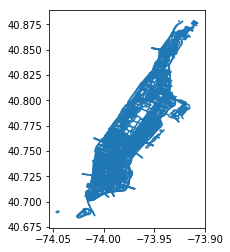

In [72]:
anglecalculation = gpd.GeoDataFrame.from_file('Output/anglecalculation.shp')
anglecalculation.plot()

In [73]:
anglecalculation.head()

,index,accessible,b_5_sc,bike_lane,borough_in,boroughcod,bphys_id,collection,continuous,created_by,...,segmentlen,shape_leng,status,stname_lab,to_level_c,trafdir,twisted_pa,within_bnd,angle,geometry
0,12,None,134110,None,None,1,756.0,None,None,DCP,...,28.005265,54.871697,2,W 17 ST,13.0,FT,N,None,286.6701358378112,LINESTRING (-74.0082589089775 40.7446738428875...
1,21,None,118190,None,None,1,23368.0,None,None,DCP,...,367.416162,375.239267,2,E 60 ST,13.0,FT,N,None,113.7411720414274,LINESTRING (-73.9626945760758 40.7607460524364...
2,34,None,133490,None,None,1,4357.0,None,None,DCP,...,83.302364,83.302336,2,WATER ST,13.0,FT,N,None,85.7336734632912,LINESTRING (-73.98391366493104 40.711303332442...
3,38,None,197110,None,None,1,148650.0,None,None,DCP,...,368.307421,472.176479,2,CENTRAL PARK GR HILL,13.0,NV,N,None,55.96268521607014,LINESTRING (-73.95925070110951 40.796498762011...
4,58,None,113610,None,None,1,2901.0,F,None,DCP,...,259.939516,259.939595,2,BROADWAY,13.0,TF,N,None,36.0820472710438,LINESTRING (-73.94778083851676 40.830263780459...
